### ADS Homework 3

**1: Classification of Hand-Written Digits**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import t

In [122]:
#Load the data
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data # the digits data
y = digits.target # the labels for the digits. This label is only used for coloring the points.
#Make a dataframe
data=pd.DataFrame(np.concatenate((y.reshape(len(y),1),X),axis=1))
data.columns=["y"]+["x{}".format(i) for i in range(1,65)]
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
#original image data is a 2D array
X.shape

(1797, 64)

Label:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


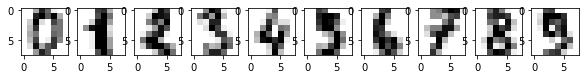

In [ ]:
#plot the digits using imshow from matplotlib
plt.figure(figsize=(10,1))
print("Label:{}".format(list(y[:10])))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

Task 1: Apply PCA to see if we can describe the data with a smaller number of most significant features

In [11]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

scalernum = preprocessing.StandardScaler().fit(data)
numS=scalernum.transform(data)  

In [48]:
pca = PCA().fit(X)
print(pca.components_)

[[-1.77484909e-19 -1.73094651e-02 -2.23428835e-01 ... -8.94184677e-02
  -3.65977111e-02 -1.14684954e-02]
 [ 3.27805401e-18 -1.01064569e-02 -4.90849204e-02 ...  1.76697117e-01
   1.94547053e-02 -6.69693895e-03]
 [-1.68358559e-18  1.83420720e-02  1.26475543e-01 ...  2.32084163e-01
   1.67026563e-01  3.48043832e-02]
 ...
 [ 0.00000000e+00  4.27173158e-16 -3.24255744e-16 ...  1.11022302e-16
  -5.55111512e-17  1.38777878e-16]
 [ 0.00000000e+00  5.01431234e-17 -9.75867742e-17 ... -6.93889390e-17
   5.55111512e-17 -3.46944695e-18]
 [ 1.00000000e+00 -1.68983002e-17  5.73338351e-18 ...  8.66631300e-18
  -1.57615962e-17  4.07058917e-18]]


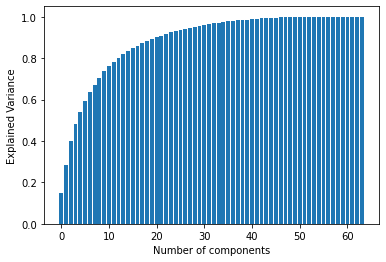

In [38]:
#perform PC decomposition over data
pca = PCA(numS.shape[1])
numP=pca.fit_transform(data)
eigenvalues = pca.explained_variance_ratio_
#plot explained variance over the number of compinents
n=64
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

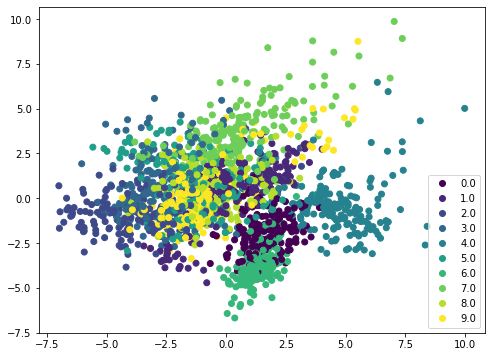

In [123]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
plt.figure(figsize=(8,6))
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(data['y']))
plt.show()

Task 2: Now use three leading PCs to visualize the digits (different colors for different digits)

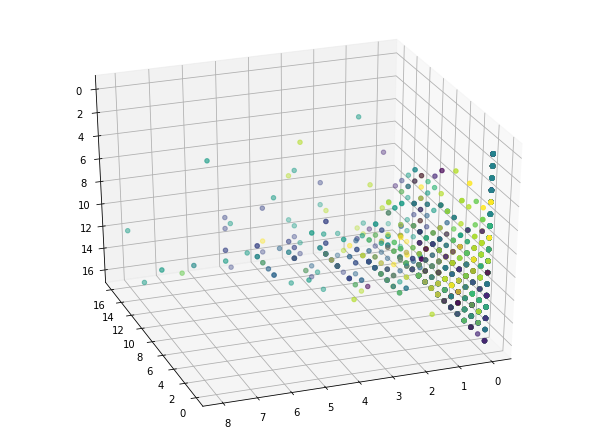

In [55]:
# use matplotlib 3D scatter plot: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
cmap=plt.cm.nipy_spectral(np.linspace(0, 1, 10))

ax.scatter(X[:,1], X[:,2], X[:,3], c=y)

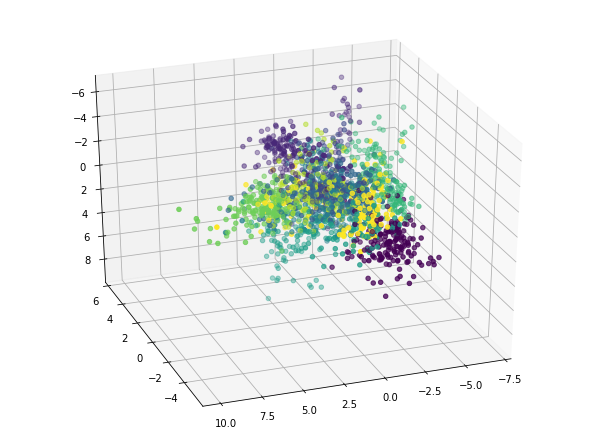

In [125]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
cmap=plt.cm.nipy_spectral(np.linspace(0, 1, 10))

ax.scatter(Xt[:,1], Xt[:,2], Xt[:,3], c=y)

Task 3: Find six examples of the pairs of digits which a) can and b) can not be clearly distinguished on a 2D plot of first two PCs (3 examples each)

In [24]:
from matplotlib import offsetbox

def embedding_plot(X, title):
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure()
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=y/10.)
    shown_images = np.array([[1., 1.]])
    for i in range(X.shape[0]):
        if np.min(np.sum((X[i] - shown_images) ** 2, axis=1)) < 1e-2: continue
        shown_images = np.r_[shown_images, [X[i]]]
        ax.add_artist(offsetbox.AnnotationBbox(offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]))
    plt.xticks([]), plt.yticks([])
    plt.title(title)

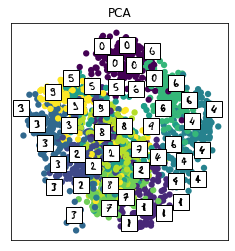

In [29]:
X_pca = PCA(n_components=2).fit_transform(X)
embedding_plot(X_pca, "PCA")
plt.show()

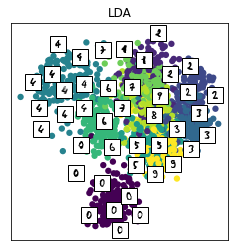

In [60]:
from sklearn import discriminant_analysis

X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
embedding_plot(X_lda, "LDA")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


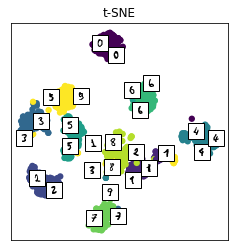

In [62]:
from sklearn import manifold

X_tsne = manifold.TSNE(n_components=2, init='pca').fit_transform(X)
embedding_plot(X_tsne,"t-SNE")
plt.show()



---



**2. PCA for feature engineering**

In [166]:
#read data
data=pd.read_csv("https://raw.githubusercontent.com/CUSP2022ADS/Data/main/pca_synthetic.csv")
data.head()

,Y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,3.035437,-18.227424,30.521149,-37.494755,31.108940,-8.917930,13.177162,10.153335,17.521327,14.695400,7.222120,3.142381,13.754352,0.115685,6.263643,8.957240
1,1.479243,31.210052,8.273238,17.545475,8.013616,-3.163515,12.632948,10.384905,7.278064,11.506060,21.150410,14.558149,15.393978,13.701066,14.993476,17.993337
2,-1.193325,-2.427634,1.698858,-1.980364,-9.902694,9.215057,9.984092,7.627307,7.701929,15.254064,15.665984,6.676761,14.504275,19.329674,11.312780,13.360359
3,0.634462,-10.778091,-4.718246,-4.861350,13.543559,-10.575067,25.562832,2.064966,12.297941,7.063591,14.787318,4.751835,16.473578,15.697654,3.765299,8.776716
4,-0.125792,5.547746,-10.935812,-1.397010,1.977636,-17.475947,13.159905,18.881544,4.986746,12.079755,13.762270,5.192296,11.656484,13.370774,16.536450,7.264736


Task 1: Run a linear regression with 'Y' as the target and x1-x15 as regressors and report out of sample R2 score

In [180]:
datalm=data.iloc[:,1:]
Y=data.Y
lm=sm.OLS(Y,sm.add_constant(datalm)).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     12.33
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           1.20e-09
Time:                        07:01:26   Log-Likelihood:                -53.727
No. Observations:                  50   AIC:                             139.5
Df Residuals:                      34   BIC:                             170.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.2459      2.386     -4.295      0.0

In [67]:
datalm.shape

(50, 15)

In [72]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.random.seed(0)
# Apply cross-validation to diagnose model for overfitting
np.random.seed(2018)
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=100 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(data.iloc[:,1:]),Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
    res=sm.OLS(y_train,X_train).fit()
    R_IS.append(res.rsquared)   
    y_pred=res.predict(X_test)
    R_OS.append(r2_score(y_test,y_pred))
    
    #R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

IS R-squared is 0.868+-0.028
OS R-squared is 0.529+-0.218


Task 2: Try PCA - use a few leading principal components as regressors and see if they will perform better in the regression

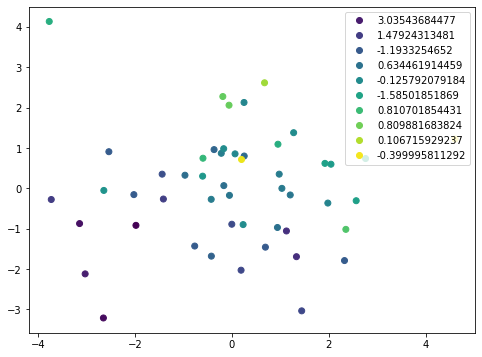

In [102]:
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
plt.figure(figsize=(8,6))
Xt = pipe.fit_transform(data)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=Y)
plt.legend(handles=plot.legend_elements()[0], labels=list(data['Y']))
plt.show()

In [174]:
scaler2 = preprocessing.StandardScaler().fit(data)
data2S=scaler2.transform(data)  

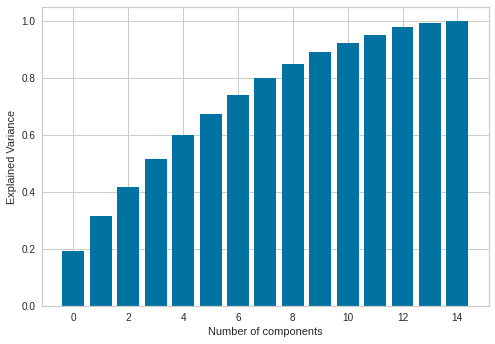

In [175]:
#perform PC decomposition over data2
pca = PCA(data2S.shape[1])
data2P=pca.fit_transform(data2S)
eigenvalues = pca.explained_variance_ratio_
#plot explained variance over the number of compinents
n=15
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

In [192]:
np.random.seed(0)
# Apply cross-validation to diagnose model for overfitting
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=100 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(data2S,Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
    #now apply PCA to the training data
    scaler = preprocessing.StandardScaler().fit(X_train) #introduce a scaler first as it is important to scale data before PCA!
    pca = PCA(8)
    P_train=pca.fit_transform(scaler.transform(X_train)) #get principal components for the scaled training sample
    res=sm.OLS(y_train,sm.add_constant(P_train)).fit() #fit the regression over 
    #and apply the same scaling and rotation (PCA) transform we learned for training sample to the test sample
    #this is important that we learn scaling and PCA transform from the training sample only rather than from both - training and test
    #as this is part of the principle component regression we need to train; and all training should happen over the training set
    P_test=pca.transform(scaler.transform(X_test))
    y_pred=np.asarray(res.predict(sm.add_constant(P_test)))
    
    R_IS.append(res.rsquared)
    R_OS.append(r2_score(y_test,y_pred))
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

IS R-squared is 0.866+-0.033
OS R-squared is 0.683+-0.145


In [194]:
np.random.seed(0)
# Apply cross-validation to diagnose model for overfitting
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=100 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(data2S,Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
    #now apply PCA to the training data
    scaler = preprocessing.StandardScaler().fit(X_train) #introduce a scaler first as it is important to scale data before PCA!
    pca = PCA(9)
    P_train=pca.fit_transform(scaler.transform(X_train)) #get principal components for the scaled training sample
    res=sm.OLS(y_train,sm.add_constant(P_train)).fit() #fit the regression over 
    #and apply the same scaling and rotation (PCA) transform we learned for training sample to the test sample
    #this is important that we learn scaling and PCA transform from the training sample only rather than from both - training and test
    #as this is part of the principle component regression we need to train; and all training should happen over the training set
    P_test=pca.transform(scaler.transform(X_test))
    y_pred=np.asarray(res.predict(sm.add_constant(P_test)))
    
    R_IS.append(res.rsquared)
    R_OS.append(r2_score(y_test,y_pred))
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

IS R-squared is 0.888+-0.027
OS R-squared is 0.703+-0.151


In [193]:
np.random.seed(0)
# Apply cross-validation to diagnose model for overfitting
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=100 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(data2P,Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
    #now apply PCA to the training data
    scaler = preprocessing.StandardScaler().fit(X_train) #introduce a scaler first as it is important to scale data before PCA!
    pca = PCA(8)
    P_train=pca.fit_transform(scaler.transform(X_train)) #get principal components for the scaled training sample
    res=sm.OLS(y_train,sm.add_constant(P_train)).fit() #fit the regression over 
    #and apply the same scaling and rotation (PCA) transform we learned for training sample to the test sample
    #this is important that we learn scaling and PCA transform from the training sample only rather than from both - training and test
    #as this is part of the principle component regression we need to train; and all training should happen over the training set
    P_test=pca.transform(scaler.transform(X_test))
    y_pred=np.asarray(res.predict(sm.add_constant(P_test)))
    
    R_IS.append(res.rsquared)
    R_OS.append(r2_score(y_test,y_pred))
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

IS R-squared is 0.653+-0.174
OS R-squared is 0.042+-0.286


In [195]:
np.random.seed(0)
# Apply cross-validation to diagnose model for overfitting
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=100 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(data2P,Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
    #now apply PCA to the training data
    scaler = preprocessing.StandardScaler().fit(X_train) #introduce a scaler first as it is important to scale data before PCA!
    pca = PCA(9)
    P_train=pca.fit_transform(scaler.transform(X_train)) #get principal components for the scaled training sample
    res=sm.OLS(y_train,sm.add_constant(P_train)).fit() #fit the regression over 
    #and apply the same scaling and rotation (PCA) transform we learned for training sample to the test sample
    #this is important that we learn scaling and PCA transform from the training sample only rather than from both - training and test
    #as this is part of the principle component regression we need to train; and all training should happen over the training set
    P_test=pca.transform(scaler.transform(X_test))
    y_pred=np.asarray(res.predict(sm.add_constant(P_test)))
    
    R_IS.append(res.rsquared)
    R_OS.append(r2_score(y_test,y_pred))
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

IS R-squared is 0.723+-0.147
OS R-squared is 0.104+-0.271


In [199]:
np.random.seed(0)
# Apply cross-validation to diagnose model for overfitting
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=100 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(data2P,Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
    #now apply PCA to the training data
    scaler = preprocessing.StandardScaler().fit(X_train) #introduce a scaler first as it is important to scale data before PCA!
    pca = PCA(12)
    P_train=pca.fit_transform(scaler.transform(X_train)) #get principal components for the scaled training sample
    res=sm.OLS(y_train,sm.add_constant(P_train)).fit() #fit the regression over 
    #and apply the same scaling and rotation (PCA) transform we learned for training sample to the test sample
    #this is important that we learn scaling and PCA transform from the training sample only rather than from both - training and test
    #as this is part of the principle component regression we need to train; and all training should happen over the training set
    P_test=pca.transform(scaler.transform(X_test))
    y_pred=np.asarray(res.predict(sm.add_constant(P_test)))
    
    R_IS.append(res.rsquared)
    R_OS.append(r2_score(y_test,y_pred))
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

IS R-squared is 0.869+-0.086
OS R-squared is 0.329+-0.271




---



3: Modeling mean income with 311 complaint patterns

In [200]:
#load the income data
dataIncome=pd.read_csv("https://raw.githubusercontent.com/CUSP2022ADS/Data/main/MeanZIP.csv",index_col=0)
dataIncome=dataIncome.apply(pd.to_numeric, errors='coerce')
dataIncome=dataIncome.loc[dataIncome.Mean>0]
dataIncome.head()

,Median,Mean,Pop
Zip,,,
1001,56662.5735,66687.7509,16445
1002,49853.4177,75062.6343,28069
1003,28462.0000,35121.0000,8491
1005,75423.0000,82442.0000,4798
1007,79076.3540,85801.9750,12962


In [201]:
## 311 data
data311 = pd.read_csv('https://raw.githubusercontent.com/CUSP2022ADS/Data/main/aggr311.csv' , index_col=0 )
data311.Zip=pd.to_numeric(data311.Zip,errors='coerce')
data311=data311.loc[(data311.Zip>=10000)&(data311.Zip<11500)] #take only NYC zip codes
data311=pd.pivot_table(data311,index='Zip',columns='Complain',values='Count',fill_value=0)
Total311=data311.sum(axis=1) #total 311 activity per zip code
data311=data311.div(data311.sum(axis=1), axis=0) #normalize activity of various cathegories within zip code by total
data311=data311.loc[Total311>100] #keep only those zip codes having sufficient activity
data311.head()

Complain,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,Bike Rack Condition,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Zip,,,,,,,,,,,,,,,,,,,,,
10000.0,0.000000,0.000000,0.008772,0.0,0.000000,0.008772,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.070175,0.070175,0.000000,0.000000,0.000000,0.0,0.0
10001.0,0.000000,0.000146,0.013179,0.0,0.000000,0.000146,0.002929,0.005272,0.000146,0.000146,...,0.000439,0.000000,0.000293,0.007468,0.000732,0.000732,0.000293,0.053595,0.0,0.0
10002.0,0.001330,0.000000,0.007095,0.0,0.000000,0.001862,0.001596,0.001774,0.000177,0.000532,...,0.000443,0.000089,0.000355,0.002394,0.001242,0.000887,0.000621,0.028734,0.0,0.0
10003.0,0.001331,0.000089,0.012690,0.0,0.000177,0.003905,0.002130,0.001154,0.000177,0.000177,...,0.000621,0.000976,0.000177,0.004792,0.002218,0.001065,0.000444,0.028219,0.0,0.0
10004.0,0.000000,0.000000,0.009740,0.0,0.000000,0.002597,0.001948,0.000649,0.000000,0.000649,...,0.000649,0.000649,0.000000,0.010390,0.013636,0.000000,0.000000,0.024026,0.0,0.0


In [202]:
#merge income data with 311
DataIncome1=dataIncome.merge(data311,left_index=True,right_index=True)
DataIncome1.head()

,Median,Mean,Pop,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Zip,,,,,,,,,,,,,,,,,,,,,
10001.0,71244.6100,123112.7764,17678,0.000000,0.000146,0.013179,0.0,0.000000,0.000146,0.002929,...,0.000439,0.000000,0.000293,0.007468,0.000732,0.000732,0.000293,0.053595,0.0,0.0
10002.0,30843.9574,46258.6118,70878,0.001330,0.000000,0.007095,0.0,0.000000,0.001862,0.001596,...,0.000443,0.000089,0.000355,0.002394,0.001242,0.000887,0.000621,0.028734,0.0,0.0
10003.0,89998.5339,139330.9968,53609,0.001331,0.000089,0.012690,0.0,0.000177,0.003905,0.002130,...,0.000621,0.000976,0.000177,0.004792,0.002218,0.001065,0.000444,0.028219,0.0,0.0
10004.0,110183.6857,156682.7615,1271,0.000000,0.000000,0.009740,0.0,0.000000,0.002597,0.001948,...,0.000649,0.000649,0.000000,0.010390,0.013636,0.000000,0.000000,0.024026,0.0,0.0
10005.0,115133.2855,163762.6601,1517,0.000000,0.000000,0.008219,0.0,0.000000,0.002192,0.000548,...,0.000000,0.000000,0.000000,0.013699,0.000000,0.000548,0.000000,0.019726,0.0,0.0


Task 1: Using 'Mean' as target variable, and 311 complaints as regressors, run a linear regression model and report out of sample (test) accuracy after cross validation

In [203]:
data=DataIncome1.iloc[:,3:]
Y=DataIncome1.Mean
lm=sm.OLS(Y,sm.add_constant(data)).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   Mean   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     23.81
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           1.11e-07
Time:                        07:13:29   Log-Likelihood:                -1611.6
No. Observations:                 175   AIC:                             3547.
Df Residuals:                      13   BIC:                             4060.
Df Model:                         161                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [131]:
DataIncome1.shape

(175, 165)

In [207]:
np.random.seed(0)
# Apply cross-validation to diagnose model for overfitting
np.random.seed(2018)
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=100 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(data.iloc[:,:]),Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
    res=sm.OLS(y_train,X_train).fit()
    R_IS.append(res.rsquared)   
    y_pred=res.predict(X_test)
    R_OS.append(r2_score(y_test,y_pred))
    
    #R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

IS R-squared is 1.000+-0.000
OS R-squared is -6.554+-12.021


In [205]:
np.random.seed(0)
# Apply cross-validation to diagnose model for overfitting
np.random.seed(2018)
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=100 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(data.iloc[:,:10]),Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
    res=sm.OLS(y_train,X_train).fit()
    R_IS.append(res.rsquared)   
    y_pred=res.predict(X_test)
    R_OS.append(r2_score(y_test,y_pred))
    
    #R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

IS R-squared is 0.637+-0.033
OS R-squared is 0.423+-0.215


Task 2: Now analyze performance using PCA depending on the number N of leading PCs to take.

In [140]:
scaler3 = preprocessing.StandardScaler().fit(DataIncome1)
data3S=scaler3.transform(DataIncome1)  

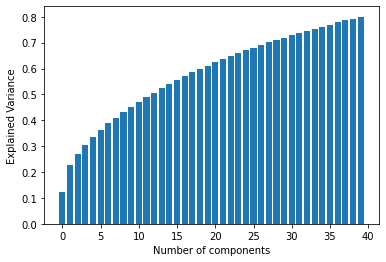

In [143]:
#perform PC decomposition over data
pca = PCA(data3S.shape[1])
data3P=pca.fit_transform(data3S)
eigenvalues = pca.explained_variance_ratio_
#plot explained variance over the number of compinents
n=40
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

In [209]:
np.random.seed(0)
# Apply cross-validation to diagnose model for overfitting
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=100 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(data3S,Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
    #now apply PCA to the training data
    scaler = preprocessing.StandardScaler().fit(X_train) #introduce a scaler first as it is important to scale data before PCA!
    pca = PCA(2)
    P_train=pca.fit_transform(scaler.transform(X_train)) #get principal components for the scaled training sample
    res=sm.OLS(y_train,sm.add_constant(P_train)).fit() #fit the regression over 
    #and apply the same scaling and rotation (PCA) transform we learned for training sample to the test sample
    #this is important that we learn scaling and PCA transform from the training sample only rather than from both - training and test
    #as this is part of the principle component regression we need to train; and all training should happen over the training set
    P_test=pca.transform(scaler.transform(X_test))
    y_pred=np.asarray(res.predict(sm.add_constant(P_test)))
    
    R_IS.append(res.rsquared)
    R_OS.append(r2_score(y_test,y_pred))
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

IS R-squared is 0.680+-0.027
OS R-squared is 0.577+-0.130


In [211]:
np.random.seed(0)
# Apply cross-validation to diagnose model for overfitting
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=100 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(data3P,Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
    #now apply PCA to the training data
    scaler = preprocessing.StandardScaler().fit(X_train) #introduce a scaler first as it is important to scale data before PCA!
    pca = PCA(3)
    P_train=pca.fit_transform(scaler.transform(X_train)) #get principal components for the scaled training sample
    res=sm.OLS(y_train,sm.add_constant(P_train)).fit() #fit the regression over 
    #and apply the same scaling and rotation (PCA) transform we learned for training sample to the test sample
    #this is important that we learn scaling and PCA transform from the training sample only rather than from both - training and test
    #as this is part of the principle component regression we need to train; and all training should happen over the training set
    P_test=pca.transform(scaler.transform(X_test))
    y_pred=np.asarray(res.predict(sm.add_constant(P_test)))
    
    R_IS.append(res.rsquared)
    R_OS.append(r2_score(y_test,y_pred))
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

IS R-squared is 0.690+-0.030
OS R-squared is 0.600+-0.207


Task 3: Try implementing Lasso regression (feature selection) over all the PCs.

In [147]:
pca = PCA(data3S.shape[1])
data3P=pca.fit_transform(data3S)

In [158]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=10000)
clf.fit(data3S,Y)
print(clf.coef_)
print(clf.intercept_)

[    0.         31563.57479248    -0.            -0.
     0.             0.            -0.             0.
     0.             0.             0.            -0.
     0.             0.            -0.            -0.
     0.             0.             0.             0.
     0.            -0.             0.            -0.
     0.             0.             0.            -0.
     0.             0.            -0.             0.
     0.             0.             0.             0.
    -0.            -0.            -0.            -0.
    -0.             0.             0.            -0.
     0.            -0.            -0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.            -0.            -0.             0.
    -0.            -0.            -0.             0.
    -0.            -0.            -0.            -0.
    -0.             0.             0.            -0.
     0.            -0.             0.         

In [159]:
clf = linear_model.Lasso(alpha=10000)
clf.fit(data3P,Y)
print(clf.coef_)
print(clf.intercept_)

[ 5895.65034848  3900.12502579     0.             0.
     0.          -329.71214389 -2361.42033432    -0.
     0.             0.         -2400.71118621     0.
    -0.            -0.             0.            -0.
    -0.             0.             0.             0.
    -0.           558.18820026    -0.             0.
    -0.             0.            -0.            -0.
     0.            -0.            -0.             0.
    -0.            -0.             0.            -0.
    -0.            -0.            -0.             0.
    -0.            -0.            -0.            -0.
    -0.             0.             0.             0.
     0.            -0.            -0.            -0.
    -0.             0.             0.             0.
    -0.             0.             0.            -0.
     0.            -0.             0.             0.
    -0.            -0.             0.             0.
     0.            -0.             0.             0.
     0.             0.             0.         

In [161]:
from sklearn.model_selection import cross_validate

scores = cross_validate(clf, data3P, Y, cv=20, return_train_score=True)
print('best test R2 in test:', sorted(scores['test_score'])[-1])
print('average test R2 in test:', scores['test_score'].mean())
print('best test R2 in train:', sorted(scores['train_score'])[-1])
print('average train R2 in test:', scores['train_score'].mean())
test_score = scores['test_score']
train_score = scores['train_score']
cross_validation_time = range(20)

best test R2 in test: 0.8933145459207151
average test R2 in test: 0.07396259478827928
best test R2 in train: 0.7833502188862602
average train R2 in test: 0.7625557325880927


Task 4: Implement cross-validation for Lasso PCA regression above with further splitting the training sample into training and validation and tuning the parameter over the validation sample

In [231]:
np.random.seed(0)
# Apply cross-validation to diagnose model for overfitting
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=100 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(data3S,Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
    #now apply PCA to the training data
    scaler = preprocessing.StandardScaler().fit(X_train) #introduce a scaler first as it is important to scale data before PCA!
    pca = PCA(20)
    P_train=pca.fit_transform(scaler.transform(X_train)) #get principal components for the scaled training sample
    res=sm.OLS(y_train,sm.add_constant(P_train)).fit() #fit the regression over 
    #and apply the same scaling and rotation (PCA) transform we learned for training sample to the test sample
    #this is important that we learn scaling and PCA transform from the training sample only rather than from both - training and test
    #as this is part of the principle component regression we need to train; and all training should happen over the training set
    P_test=pca.transform(scaler.transform(X_test))
    y_pred=np.asarray(res.predict(sm.add_constant(P_test)))
    
    R_IS.append(res.rsquared)
    R_OS.append(r2_score(y_test,y_pred))
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

IS R-squared is 0.905+-0.021
OS R-squared is 0.479+-0.500
